In [2]:
#imports
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

In [60]:
#load dataset
mnist = fetch_openml(name='mnist_784')

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [ ]:
mnist

In [61]:
#splat data and labels
X_mnist = mnist.data
Y_mnist = mnist.target

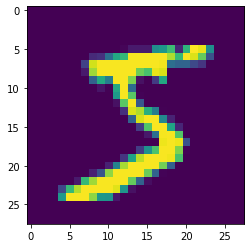

In [62]:
#show first image
%matplotlib inline
plt.imshow(X_mnist[0].reshape((28,28)))


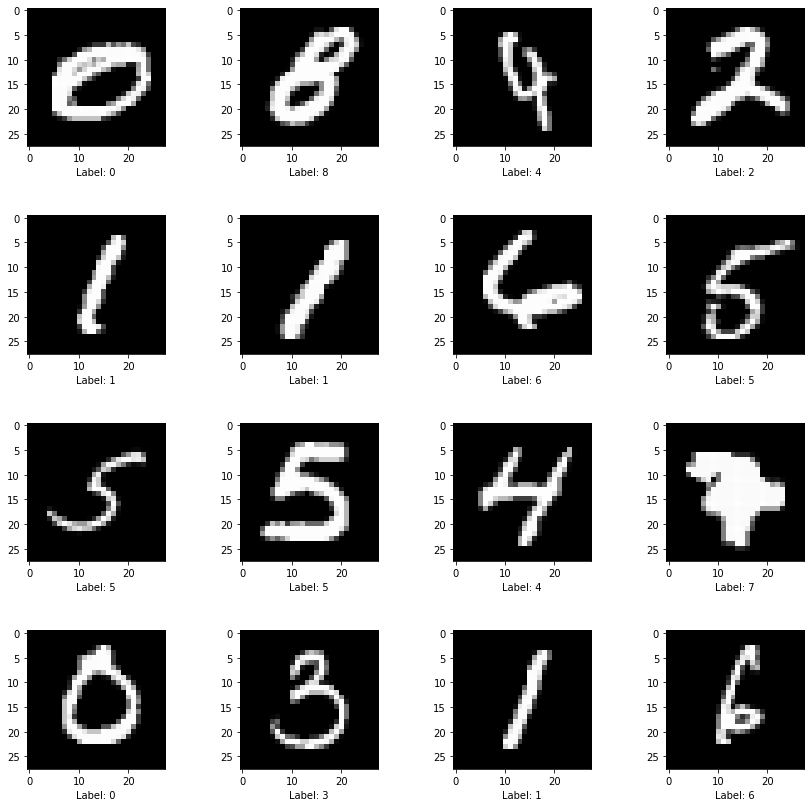

In [67]:
#plot random images
def draw_batch(dataset,label,nrows,ncols):
    idx_batch = np.random.randint(0,70000,nrows*ncols)
    fig = plt.figure(figsize=(14,14))
    for j in range(0,nrows*ncols):
        plt.subplot(nrows,ncols,j+1)
        plt.imshow(dataset[idx_batch[j]].reshape((28,28)), cmap=plt.cm.binary_r)
        plt.xlabel('Label: '+Y_mnist[idx_batch[j]])
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

draw_batch(X_mnist,Y_mnist,4,4)

In [68]:
#create training and testing dataset
X_train, Y_train, X_test, Y_test = X_mnist[:60000], Y_mnist[:60000], X_mnist[60000:], Y_mnist[60000:]

In [74]:
# train random forest clf
from sklearn.ensemble import RandomForestClassifier

rnd_for_clf = RandomForestClassifier(n_estimators=100)

In [75]:
import time

t0 = time.time()
rnd_for_clf.fit(X_train,Y_train)
t1 = time.time()

In [76]:
print('Training took {:.2f}s'.format(t1-t0))

Training took 105.68s


In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

In [85]:
X_test_pca = pca.transform(X_test)

In [86]:
rnd_for_clf_pca = RandomForestClassifier(n_estimators=100)
t0 = time.time()
rnd_for_clf_pca.fit(X_train_pca,Y_train)
t1 = time.time()
print('Training took {:.2f}s'.format(t1-t0))

Training took 227.09s


In [87]:
#accuracy score of the 2 trees
from sklearn.metrics import accuracy_score

Y_pred = rnd_for_clf.predict(X_test)
score_rnd_for_clf = accuracy_score(Y_test, Y_pred)

Y_pred_pca = rnd_for_clf_pca.predict(X_test_pca)
score_rnd_for_clf_pca = accuracy_score(Y_test, Y_pred_pca)

print('Random Forest score: ',score_rnd_for_clf)
print('Random Forest PCA score: ',score_rnd_for_clf_pca)

Random Forest score:  0.9698
Random Forest PCA score:  0.9477


So PCA hat die Genauigkeit nur minimal verringert. Die Trainingszeit aber verdoppelt. Im Buch war die zeit sogar 4 mal länger als ohne PCA.
Jetzt testen wir noch wie sich die PCA bei einer LogisticRegression verhällt

In [88]:
from sklearn.linear_model import LogisticRegression

log_clf_reg = LogisticRegression(multi_class='multinomial')
t0 = time.time()
log_clf_reg.fit(X_train, Y_train)
t1 = time.time()
print("Training took {:.2f}".format(t1-t0))

Training took 29.24


C:\Users\flori\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [89]:
log_clf_reg_pca = LogisticRegression(multi_class='multinomial')
t0 = time.time()
log_clf_reg_pca.fit(X_train_pca, Y_train)
t1 = time.time()
print("Training took {:.2f}".format(t1-t0))

Training took 13.50


C:\Users\flori\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [90]:
Y_pred = log_clf_reg.predict(X_test)
score_log_clf_reg = accuracy_score(Y_test, Y_pred)

Y_pred_pca = log_clf_reg_pca.predict(X_test_pca)
score_log_clf_reg_pca = accuracy_score(Y_test, Y_pred_pca)

print('Logistic Regression score: ',score_log_clf_reg)
print('Logistic Regression PCA score: ',score_log_clf_reg_pca)

Logistic Regression score:  0.9255
Logistic Regression PCA score:  0.9201
